     price  surface  arrondissement
0     1820    46.10             1.0
1     1750    41.00             1.0
2     1900    55.00             1.0
3     1950    46.00             1.0
4     1950    49.00             1.0
..     ...      ...             ...
822    850    35.00            10.0
823    700    10.00            10.0
824   1280    34.00            10.0
825   1545    65.00            10.0
826   1000    21.43            10.0

[827 rows x 3 columns]


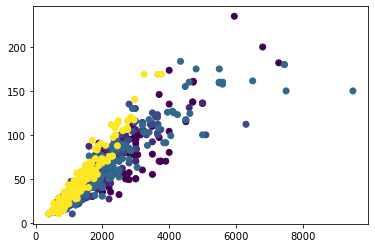

In [53]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On charge le dataset
house_data = pd.read_csv('house_data.csv')
print(house_data)

# On affiche le nuage de points dont on dispose
house_data = house_data[house_data['price'] < 10000]
house_data = house_data.dropna()
house_data = house_data.reset_index(drop = True)
plt.scatter(house_data['price'], house_data['surface'],c=house_data['arrondissement'])
plt.show()

C:\Users\hp\AppData\Local\Temp/ipykernel_15420/2962300291.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure().gca(projection='3d')


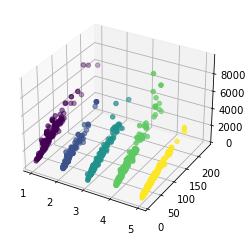

In [54]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure().gca(projection='3d')

# Pour faciliter la visualisation, on va changer la valeur de l'arrondissement (10)
tmp_arr = house_data['arrondissement'][:]
tmp_arr[tmp_arr == 10] = 5

fig.scatter(tmp_arr, house_data['surface'], house_data['price'], c=tmp_arr, cmap="viridis")
plt.show()

In [55]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(house_data[["surface", "arrondissement"]], house_data[["price"]], train_size=0.8)

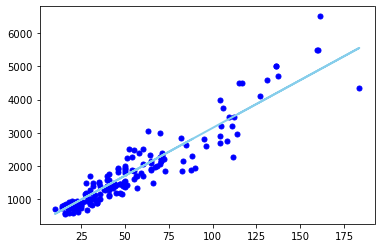

In [57]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(xtrain[["surface"]], ytrain)
Y_pred = regr.predict(xtest[["surface"]])

plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["surface"]], Y_pred, color="skyblue", linewidth = 2)

In [58]:
lrs = []
for i in np.unique(xtrain["arrondissement"]):
    
    # On génère un jeu de données par arrondissement
    tr_arr = xtrain['arrondissement']==i
    te_arr = xtest['arrondissement']==i
    
    xtrain_arr = xtrain[tr_arr]
    ytrain_arr = ytrain[tr_arr]

    xtest_arr = xtest[te_arr]
    ytest_arr = ytest[te_arr]

    lr = LinearRegression()
    lr.fit(xtrain_arr[["surface"]], ytrain_arr)
    lrs.append(lr)

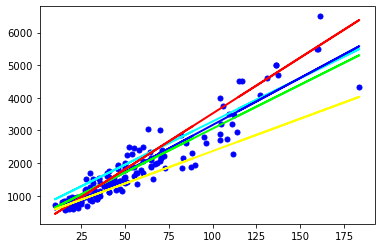

In [59]:
plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["surface"]], lrs[0].predict(xtest[["surface"]]), color="#00FFFF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[1].predict(xtest[["surface"]]), color="#0000FF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[2].predict(xtest[["surface"]]), color="#00FF00", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[3].predict(xtest[["surface"]]), color="#FF0000", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[4].predict(xtest[["surface"]]), color="#FFFF00", linewidth = 2)